# Midterm

Please hand in the midterm via MarkUs by 9:00am on Thursday, October 26th. You are welcome to spend any amount of time working on the midterm before then. The midterm is "open-course-materials": you are allowed to consult the textbook (d2l.ai), my lecture notes, class recordings, your own course notes, past homeworks, and tutorial materials. You are welcome to check your answers by writing and running code, but this should not be necessary for any of the problems. No collaboration with other students or use of other sources is allowed.

# Problem 1 (2 points)

In class, we introduced the weight decay regularizer, which adds a loss term $\lambda ||w||_2^2$ where $w$ is a vector comprising all of the parameters of the model and $\lambda$ is a scalar hyperparameter. An alternative is L1 regularization, which adds the loss term $\lambda |w|$. Let the model's original, unregularized loss be $L$, so that the regularized loss is $L + \lambda |w|$.
1. What is the gradient of the L1 regularization term with respect to the parameters $w$? For simplicity, you can assume the model has only one parameter, so that $w$ is a scalar.
1. What is the parameter update under normal gradient descent for $L + \lambda |w|$? Since you don't know $L$, you can include a $\nabla_w L$ term in your answer.

##Problem 1 Answer
1)The gradient of the $L_1$ regularization term is:
$$\frac{d}{dw}L_1 = \frac{d}{dw}\lambda |w| = \lambda \frac{w}{|w|}$$
2) The parameter update is:
$$W \gets  -(\nabla_w L +  \lambda \frac{w}{|w|})$$


# Problem 2 (6 points)

Consider the following model and loss function:
\begin{align}
h &= \text{ReLU}(W_hx) \\
o &= W_oh + x \\
L(y, o) &= (y - o)^2 \\
\end{align}
where $x$ is the input, $y \in \mathbb{R}$ is the scalar target, $W_h$ and $W_o$ are learnable parameters, and $o \in \mathbb{R}$ is the scalar output of the model.

1. Derive the expressions for the gradient of the loss with respect to every parameter in the model (that is, $\frac{\partial L}{\partial W_o}$ and $\frac{\partial L}{\partial W_h}$).
1. Re-express the model as a computational graph. The graph can have the following operations: Dot product, addition (not subtraction), elementwise maximum (ReLU), elementwise multiplication, and elementwise power (e.g. squaring). Your graph node should have leaf nodes corresponding to parameters and inputs.
1. Specify which nodes in your graph have an output that needs to be cached in order to use the backpropagaion algorithm.

## Problem 2 Answer
1) The gradients of the loss w.r.t $W_o$ and $W_h$ are:

For $\frac{dL}{dW_o}$:
$$\frac{d L}{dW_o} = \frac{dL}{do}\cdot\frac{d o}{dW_o}$$
$$ \frac{dL}{do}  = \frac{d}{do}(y-o)^2 = -2(y-o)$$
$$ \frac{do}{dW_o}  = \frac{d}{dW_o}(W_oh+x) = h$$
Therefore:
$$\frac{d L}{dW_o} = \frac{dL}{do}\cdot\frac{d o}{dW_o} = - 2\cdot h(y-o) $$

For $\frac{dL}{dW_h}$:

$$\frac{d L}{dW_h} = \frac{dL}{do}\cdot\frac{d o}{dh}\cdot\frac{dh}{dWh}$$

$$ \frac{dL}{do}  = \frac{d}{do}(y-o)^2 = -2(y-o) $$

$$\frac{d L}{dW_h} = \frac{dL}{do}\cdot\frac{d o}{dh}\cdot\frac{dh}{dWh}$$
$${d L}{dW_h} = - 2\cdot h(y-o)(h+\frac{dx}{do})(x relu'(w_x x))$$
with $relu'(x) = 0 $ for $ x < 0$ and $=1$ for $x>0$

2,3)The graph is displayed bellow. Purple nodes are the ones with outputs stored.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


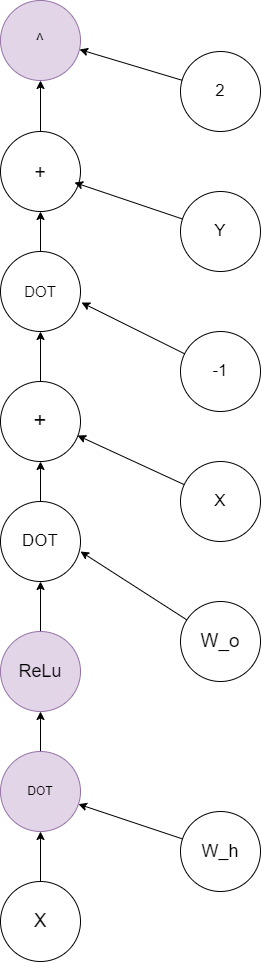

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image('/content/drive/MyDrive/graph.drawio.png')

# Problem 3 (3 points)

Consider a convolutional neural network with the following structure:
- Input image of size 32x32x3 (32 width, 32 height, 3 channels)
- Convolutional layer with a 5x5 filter, 32 channels, stride of 1x1, and padding of 2x2
- ReLU nonlinearity
- Batch normalization
- Max pooling with a 2x2 window, stride of 2x2, and no padding
- Convolutional layer with a 3x3 filter, 64 channels, stride of 1x1, and padding of 1x1
- ReLU nonlinearity
- Batch normalization
- Max pooling with a 2x2 window, stride of 2x2, and no padding
- Convolutional layer with a 1x1 filter, 100 channels, stride of 1x1, and no padding

1. What is the output shape (dimensionality/size of the activations) at the output of these layers?
1. What is the receptive field of the input for one of the activations at the output of the model? Recall that the receptive field means the region of the input that influences a given activation.
1. Assume that we remove all padding from all convolutional layers in the model. What is the output shape of these layers now?
1. Now, instead assume that we remove the batch normalization and change the nonlinearities to be sigmoid instead of ReLU. What is the output shape of these layers now?
1. Say we want to use this model for 10-class classification, so we add a single classification layer (i.e. a softmax regression model) to the output. How many parameters will this classification layer have?
1. Imagine instead that we add a global average pooliong layer on the output of the layer stack before the 10-way softmax classification layer. How many parameters will the classification layer have now?

## Problem 3 Answer
Note: No bias are considered.

1) Considering prediction time, the dimensions are:

- Input image of size 32x32x3 (32 width, 32 height, 3 channels)
-$32\times32\times3$
- Convolutional layer with a 5x5 filter, 32 channels, stride of 1x1, and padding of 2x2
-$32\times32\times32$
- ReLU nonlinearity
-$32\times32\times32$
- Batch normalization
-$32\times32\times32$
- Max pooling with a 2x2 window, stride of 2x2, and no padding
-$16\times16\times32$
- Convolutional layer with a 3x3 filter, 64 channels, stride of 1x1, and padding of 1x1
-$16\times16\times64$
- ReLU nonlinearity
-$16\times16\times64$
- Batch normalization
-$16\times16\times64$
- Max pooling with a 2x2 window, stride of 2x2, and no padding
-$8\times8\times64$
- Convolutional layer with a 1x1 filter, 100 channels, stride of 1x1, and no padding
-$8\times8\times100$

2) The rececptive field of one activation from the output is $15\times 15 \times 3$

3)Removing padding, we have:

- Input image of size 32x32x3 (32 width, 32 height, 3 channels)
-$32\times32\times3$
- Convolutional layer with a 5x5 filter, 32 channels, stride of 1x1, and no padding
-$28\times28\times32$
- ReLU nonlinearity
-$28\times28\times32$
- Batch normalization
-$28\times28\times32$
- Max pooling with a 2x2 window, stride of 2x2, and no padding
-$14\times14\times32$
- Convolutional layer with a 3x3 filter, 64 channels, stride of 1x1, and no padding
-$12\times12\times64$
- ReLU nonlinearity
-$12\times12\times64$
- Batch normalization
-$12\times12\times64$
- Max pooling with a 2x2 window, stride of 2x2, and no padding
-$6\times6\times64$
- Convolutional layer with a 1x1 filter, 100 channels, stride of 1x1, and no padding
-$6\times6\times100$

4) The dimensions stay the same as in 1)

5) To do so, we will need $N \times M$ parameters, with $N =$ number of input parameters and $M =$ number of outputs. Considering the model from 4), we'll need $8\times 8 \times 100 \times 10 = 64,000$ parameters.

6) If we apply global average pooling, each $8\times 8$ matrix slice will have its average computed. Therefore we'll have a vector with 100 components and will need $ 100 \times 10 = 1,000$ parameters.



# Problem 4 (2 points)

1. In the olden days of neural networks, it was popular to use the following nonlinearity: $$\phi(x) = \begin{cases} 0, x < 0\\1, x \ge 0\end{cases}$$ Can you foresee any issue with using gradient descent to train a neural network that uses this nonlinearity?
1. An alternative to the ReLU nonlinearity is the softplus: $$\phi(x) = \log(1 + \exp(x))$$ What is the gradient of this nonlinearity with respect to x? Name one advantage and one disadvantage of this nonlinearity over ReLU.

## Problem 4 Answer
1) We can observe that for $x<0$ and $x\ge 0$ the gradients of $\phi$ w.r.t $x$ are equal to 0. Therefore updating parameters trough gradient descent is not efficient for models utilizing this nonlinearity.

2) The gradient is given by:

$$\frac{d \phi}{dx} = \frac{exp(x)}{1+exp(x)}$$

One disadvantage of softplus over ReLu is its higher computational complexity on foward passes and gradients computations. One advantage is that its derivative is not zero for $x<0$, therefore parameters will be updated at this range (unlike relu).

# Problem 5 (4 points)

A less-popular alternative to batch and layer normalization is weight normalization, which replaces each weight vector $w$ in the model with $\frac{\gamma}{||v||}v$ where $\gamma$ is a new scalar parameter and $v$ is a new vector of parameters with the same shape as $w$.

1. Derive expressions for $\nabla_\gamma L$ and $\nabla_v L$ in terms of $\gamma$, $v$, and $\nabla_w L$.

2. Show that applying batch normalization *without the shift parameter $\beta$* to the preactivation $vx$ is equivalent to applying weight normalization if the entries of $x$ are independently distributed with zero mean and unit variance.


## Problem 5 Answer

1)$\nabla_\gamma L$ and $\nabla_v L$:

Applying the chain rule:
$$\nabla_\gamma L =\frac{dL}{dw} \frac{dw}{d\gamma} =  \frac{\nabla_w L}{||v||}v$$

Applying the chain rule and the quotient rule:

$$\nabla_v L =\frac{dL}{dw} \frac{dw}{dv} =  \nabla_w L(\frac{\gamma||v|| - \frac{\gamma v^2}{||v||}}{||v||^2}) = \frac{\nabla_w L\gamma}{||v||} -\frac{ \nabla_w L\frac{\gamma v^2}{||v||}}{||v||^2}$$

we can further simplify by using $\nabla_\gamma L$:
$$\frac{\nabla_w L\gamma}{||v||} -\frac{ \nabla_w L\frac{\gamma v}{||v||}}{||v||^2} = \frac{\gamma \nabla_w L}{||v||} - \frac{\gamma \nabla_\gamma L }{||v||^2}v $$

2)Without $\beta$, we have:

$$BN(vx) = \gamma \frac{vx - \hat{\mu}_B}{ \hat{\sigma}_B}$$

With zero mean and unit variance we have $\hat{\mu}_B = 0$ and $\hat{\sigma}_B(vx) = \frac{1}{|B|}\sqrt{\sum_{x\in B}(vx- 0)^2}$ :

$$BN(vx) = \gamma \frac{vx}{ x||v||} = \gamma \frac{v}{ ||v||} $$


# Problem 6 (3 points)

Consider the Adam optimizer and assume that $g_t = g \ne 0$, i.e. the gradient is the same value $g \ne 0$ at all iterations of training.

1. Assume that $\epsilon = 0$, $0 < \beta < 1$, and $0 < \beta_2 < 1$ and show that $g^\prime_t = \eta\, \text{sign}(g)$.
2. Now, consider the case when $\epsilon$ is large, e.g. $\epsilon = 1$. How does the function for $g^\prime_t$ change?

## Problem 6 Answer

1)In this setup we have:
$$ V_t = \beta V_{t-1} + (1-\beta)g$$
$$ S_t = \beta_2 S_{t-1} + (1-\beta_2)g^2$$
$$ \hat{V}_t = \frac{V_t}{1-\beta^t}$$
$$ \hat{S}_t = \frac{S_t}{1-\beta_2^t}$$
$$ g'_t = \eta \frac{\hat{V}_t}{\sqrt{\hat{s}_t}}$$

Since $g_t=g$ and $g_t^2 = g^2$ are constant, for a large $t$, we can consider the unbiased exponential weighted mooving averages $\hat{V}_t$ and $\hat{S_t}$ as:

$$ \hat{V_t} = g$$
$$ S_t = g^2$$

Therefore:
$$ g'_t = \eta \frac{g}{\sqrt{g^2}} = \eta \frac{g}{|g|} =\eta sign(g) $$

2)If $\epsilon$ grows, $g'_t$ is scalled down. i.e., $g'_t$ has the same signal but $|g'_t|$ gets smaller. A similar effect can be achieved by choosing a smaler $\eta$ and keeping $\epsilon = 0$
